In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
def return_nn_classifier():
        model = Sequential()
        model.add(Dense(60, input_shape=(10,), activation='relu'))
        model.add(Dense(60, activation='relu'))
        model.add(Dense(60, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy',
                           metrics=['accuracy'])
        return model

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv("Churn_Modelling.csv", sep=',')

column_selector = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                   'IsActiveMember', 'EstimatedSalary', 'Exited']

dataset = dataset[column_selector]

#remove outlier
def remove_outlier(feature):
    first_q = np.percentile(dataset[feature],25)
    third_q = np.percentile(dataset[feature],75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR

    mean = dataset[feature].median()

    dataset.loc[dataset[feature] < minimum, feature] = mean
    dataset.loc[dataset[feature] > maximum, feature] = mean

outliers = ["CreditScore", "Age", "NumOfProducts"]

for i in range(len(outliers)):
    remove_outlier(outliers[i])

#Scale data
column_normalize_selector = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scalar = MinMaxScaler()
dataset[column_normalize_selector] = scalar.fit_transform(dataset[column_normalize_selector])


# convert categorical to one hot
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Geography'] = le.fit_transform(dataset['Geography'])

print(dataset.head())

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

# Run three models

model_DecisionTree = DecisionTreeClassifier()
model_DecisionTree.fit(X_train, y_train)
print(model_DecisionTree.score(X_test, y_test))
print("Confusion matrix for decision tree: ")
print(confusion_matrix(y_test, model_DecisionTree.predict(X_test)))


model_LinearSVC = LinearSVC()
model_LinearSVC.fit(X_train, y_train)
print(model_LinearSVC.score(X_test, y_test))
print("Confusion matrix for SVC : ")
print(confusion_matrix(y_test, model_LinearSVC.predict(X_test)))

model_NN = KerasClassifier(build_fn=return_nn_classifier, 
                                 epochs=100, 
                                 batch_size=10, 
                                 verbose=0)
model_NN.fit(X_train, y_train)
print(model_NN.score(X_test, y_test))
print("Confusion matrix for NN : ")
print(confusion_matrix(y_test, model_NN.predict(X_test)))



   CreditScore  Geography  Gender       Age  Tenure   Balance  NumOfProducts  \
0     0.505353          0       0  0.545455       2  0.000000            1.0   
1     0.481799          2       0  0.522727       1  0.334031            1.0   
2     0.254818          0       0  0.545455       8  0.636357            3.0   
3     0.676660          0       0  0.477273       1  0.000000            2.0   
4     1.000000          2       0  0.568182       2  0.500246            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         0.506735       1  
1          0               1         0.562709       0  
2          1               0         0.569654       1  
3          0               0         0.469120       0  
4          1               1         0.395400       0  
0.7824242424242425
Confusion matrix for decision tree: 
[[2251  370]
 [ 348  331]]
0.813939393939394
Confusion matrix for SVC : 
[[2548   73]
 [ 541  138]]
0.8048484818501906
Confusio

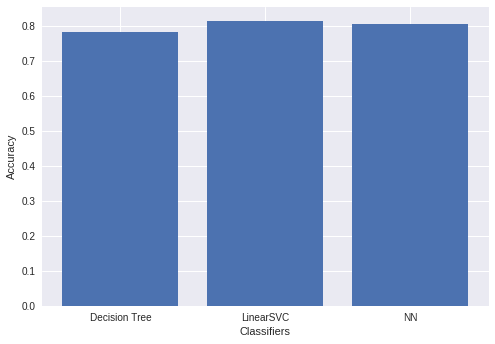

In [3]:
# draw accuracy plot

accuracy_list = [model_DecisionTree.score(X_test, y_test), model_LinearSVC.score(X_test, y_test), 
                 model_NN.score(X_test, y_test)]
label = ['Decision Tree', "LinearSVC", "NN"]
plt.bar(np.arange(len(label)),accuracy_list)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.xticks(np.arange(len(label)),label)
plt.show()


In [0]:

k_fold_decision_tree_scores = []
k_fold_nn_scores = []
k_fold_SVC_scores = []

# K-fold results
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model_DecisionTree.fit(X_train, y_train)
  k_fold_decision_tree_scores.append(model_DecisionTree.score(X_test, y_test))

  model_LinearSVC.fit(X_train, y_train)
  k_fold_SVC_scores.append(model_LinearSVC.score(X_test, y_test))
  
  
  model_NN.fit(X_train, y_train)
  k_fold_nn_scores.append(model_NN.score(X_test, y_test))



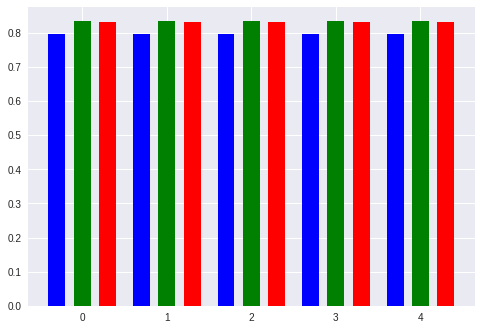

In [5]:
ax = plt.subplot(111)
for i in range(len(k_fold_decision_tree_scores)):
  ax.bar(i-0.3, k_fold_decision_tree_scores,width=0.2,color='b',align='center')
for i in range(len(k_fold_nn_scores)):
  ax.bar(i, k_fold_nn_scores,width=0.2,color='g',align='center')
for i in range(len(k_fold_SVC_scores)):
  ax.bar(i+0.3, k_fold_SVC_scores,width=0.2,color='r',align='center')

plt.show()

In [0]:
# cross validation
from sklearn.model_selection import cross_val_score

cross_val_decision_tree = cross_val_score(model_DecisionTree, X, y, cv=5)
cross_val_SVC = cross_val_score(model_LinearSVC, X, y, cv=5)
cross_val_nn = cross_val_score(model_NN, X, y, cv=5)

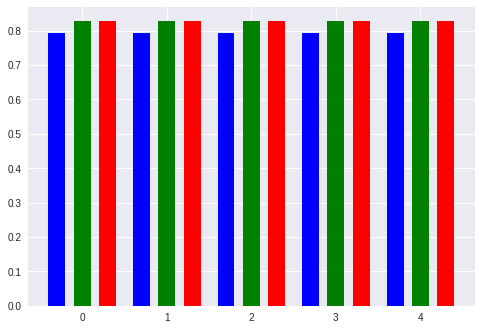

In [79]:
ax = plt.subplot(111)
for i in range(len(cross_val_decision_tree)):
  ax.bar(i-0.3, cross_val_decision_tree,width=0.2,color='b',align='center')
for i in range(len(cross_val_SVC)):
  ax.bar(i, cross_val_SVC,width=0.2,color='g',align='center')
for i in range(len(cross_val_nn)):
  ax.bar(i+0.3, cross_val_nn,width=0.2,color='r',align='center')

plt.show()

In [0]:
# precision recall and f-score
from sklearn.metrics import precision_recall_fscore_support

precision_decision_tree, recall_decision_tree, fscore_decision_tree, support_decision_tree = precision_recall_fscore_support(
y_test, model_DecisionTree.predict(X_test), average = 'macro')
print(recall_decision_tree)

precision_SVC, recall_SVC, fscore_SVC, support_SVC = precision_recall_fscore_support(
y_test, model_LinearSVC.predict(X_test), average = 'macro')
print(recall_SVC)

precision_NN, recall_NN, fscore_NN, support_NN = precision_recall_fscore_support(
y_test, model_NN.predict(X_test), average = 'macro')
print(recall_NN)


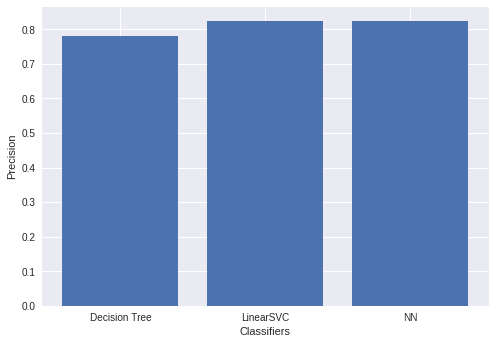

In [90]:
# precision plot
precision_list = [precision_decision_tree,precision_SVC, precision_NN ]
label = ['Decision Tree', "LinearSVC", "NN"]
plt.bar(np.arange(len(label)),accuracy_list)
plt.xlabel("Classifiers")
plt.ylabel("Precision")
plt.xticks(np.arange(len(label)),label)
plt.show()


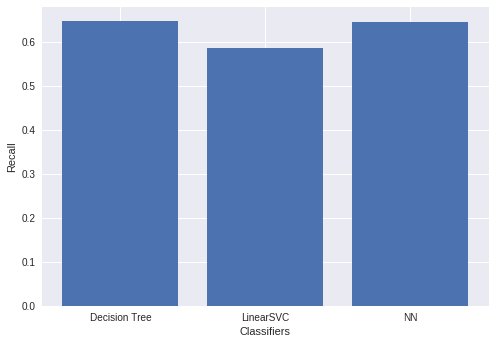

In [87]:
# recall plot
recall_list = [recall_decision_tree, recall_SVC, recall_NN ]
label = ['Decision Tree', "LinearSVC", "NN"]
plt.bar(np.arange(len(label)),recall_list)
plt.xlabel("Classifiers")
plt.ylabel("Recall")
plt.xticks(np.arange(len(label)),label)
plt.show()


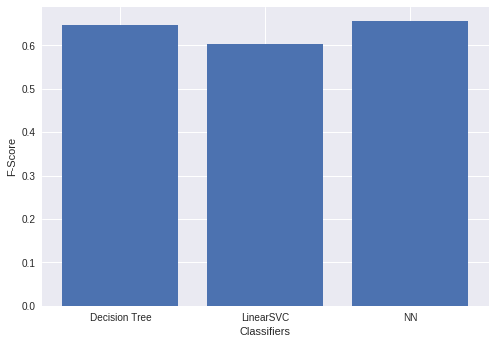

In [88]:
# fscore plot
fscore_list = [fscore_decision_tree, fscore_SVC, fscore_NN ]
label = ['Decision Tree', "LinearSVC", "NN"]
plt.bar(np.arange(len(label)),fscore_list)
plt.xlabel("Classifiers")
plt.ylabel("F-Score")
plt.xticks(np.arange(len(label)),label)
plt.show()